 # Supervised Learning - Project2 - Thera Bank loan campaign

Campaign for selling personal loans.

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

1. Read the column description and ensure you understand each attribute well
2. Study the data distribution in each attribute, share your findings. (5 points)
3. Get the target column distribution. Your comments
4. Split the data into training and test set in the ratio of 70:30 respectively
5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)
6. Print the confusion matrix for all the above models (5 points)
7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)

ID:	Customer ID							
Age:	Customer's age in completed years							
Experience:	#years of professional experience							
Income:	Annual income of the customer in $           							
ZIPCode:	Home Address ZIP code.	
Family:	Family size of the customer							
CCAvg:	Avg. spending on credit cards per month 						
Education:	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional							
Mortgage:	Value of house mortgage if any. 							
Personal Loan:	Did this customer accept the personal loan offered in the last campaign?							
Securities Account:	Does the customer have a securities account with the bank?							
CD Account:	Does the customer have a certificate of deposit (CD) account with the bank?							
Online:	Does the customer use internet banking facilities?							
CreditCard:	Does the customer use a credit card issued by UniversalBank?							

###### Importing all necessary libraries

In [447]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BaseDiscreteNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import BaseNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

###### reading file

In [448]:
bank=pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')

In [449]:
bank.sample(4)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
781,782,56,32,158,94588,3,3.7,3,0,1,0,0,1,0
3759,3760,31,4,29,92093,4,1.5,2,121,0,0,0,1,1
3101,3102,55,31,91,93555,2,2.8,1,0,0,0,0,0,0
3580,3581,41,16,62,94553,2,2.2,3,0,0,0,0,1,1


## Exploratory data analytics 

In [450]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


###### Input file has 14 columns and 5000 rows. All the variables are numeric field either int or float. There are no missing values in the dataset. 

In [451]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


###### Variables understanding:
ID: This is an incremental customer ID which is starting from 1 to 5000. 

Age: We are analyzing the customers for loan who are in the age of 23 to 67. Median age is 45 which is simillar to mean which infers that data is normally distributed across age.  

Experience: Experience is number of years of customer's professional experience. Data shows that customer has minimum experience as -3 which looks suspecious as experience should be zero or above. Highest experience is 43 years. Mean and median is almost equal which infers that data is normally distributed across experience as well. 

Income: Customers are having annual income of 8 dollar minimum to 224 dollar maximum. Mean annual income is 73 dollar which is higher than median of 64 dollar which infers that data is positively skewed for income. Standard deviation is 46 but the dispersion from 75% to max is too high which shows that there are some outliers on high annual income.  

Zip Code: Zip code is numeric field in the data but we should not consider it for calculation as it should be treated as string. 

Family: On an average, family size is 2 and maximum is 4. Data looks normally distributed here as mean and median are almost same. 

CCAvg: mean of Avg credit card spending per month is higher than median spending of 1.5 dollar. Hence data is right skewed and has outliers as well on higher side. 

Education: as per median, customers are graduated which is higher than mean value which indicates data is left skewed that means majority of customers among sample are graduated or post graduated only. 

Mortgage: It is highely right skewed as median shows 0 which infers more than half of the population does not have any mortgage to pay on their house. 

Personal Loan: As per the statement, only 9% customers accepted loan in last campaign. 

Securities Account: More than 75% customers does not have any Securities Account.

CD Account: More than 75% customers does not have any CD Account.

Online: About 75% customers uses internet banking facilities.

CreditCard: More than 50% customers does not have CreditCard. 

###### Analysing the negative experience customers.

In [452]:
bank[bank['Experience']<0].head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0


In [453]:
bank[bank['Experience']<0].count()

ID                    52
Age                   52
Experience            52
Income                52
ZIP Code              52
Family                52
CCAvg                 52
Education             52
Mortgage              52
Personal Loan         52
Securities Account    52
CD Account            52
Online                52
CreditCard            52
dtype: int64

###### 52 customers are showing experience as negative. 

###### Since experience should not be negative hence using absolute value of it

In [454]:
bank['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

In [455]:
bank['Experience']=abs(bank['Experience'])

In [456]:
bank.sample()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3543,3544,37,11,194,94303,2,0.0,1,0,0,0,0,0,0


In [457]:
bank['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43], dtype=int64)

###### Analysing target variable

In [458]:
bank['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

###### As per the statement, only 480 customers accepted loan in last campaign. This is the target field which we want to predict for our next campaign. As we see labels are not equally distributed in sample data hence chances of predicting 0 (no loan) would be higher than 1 (accepted loan). 

###### Distribution of features 

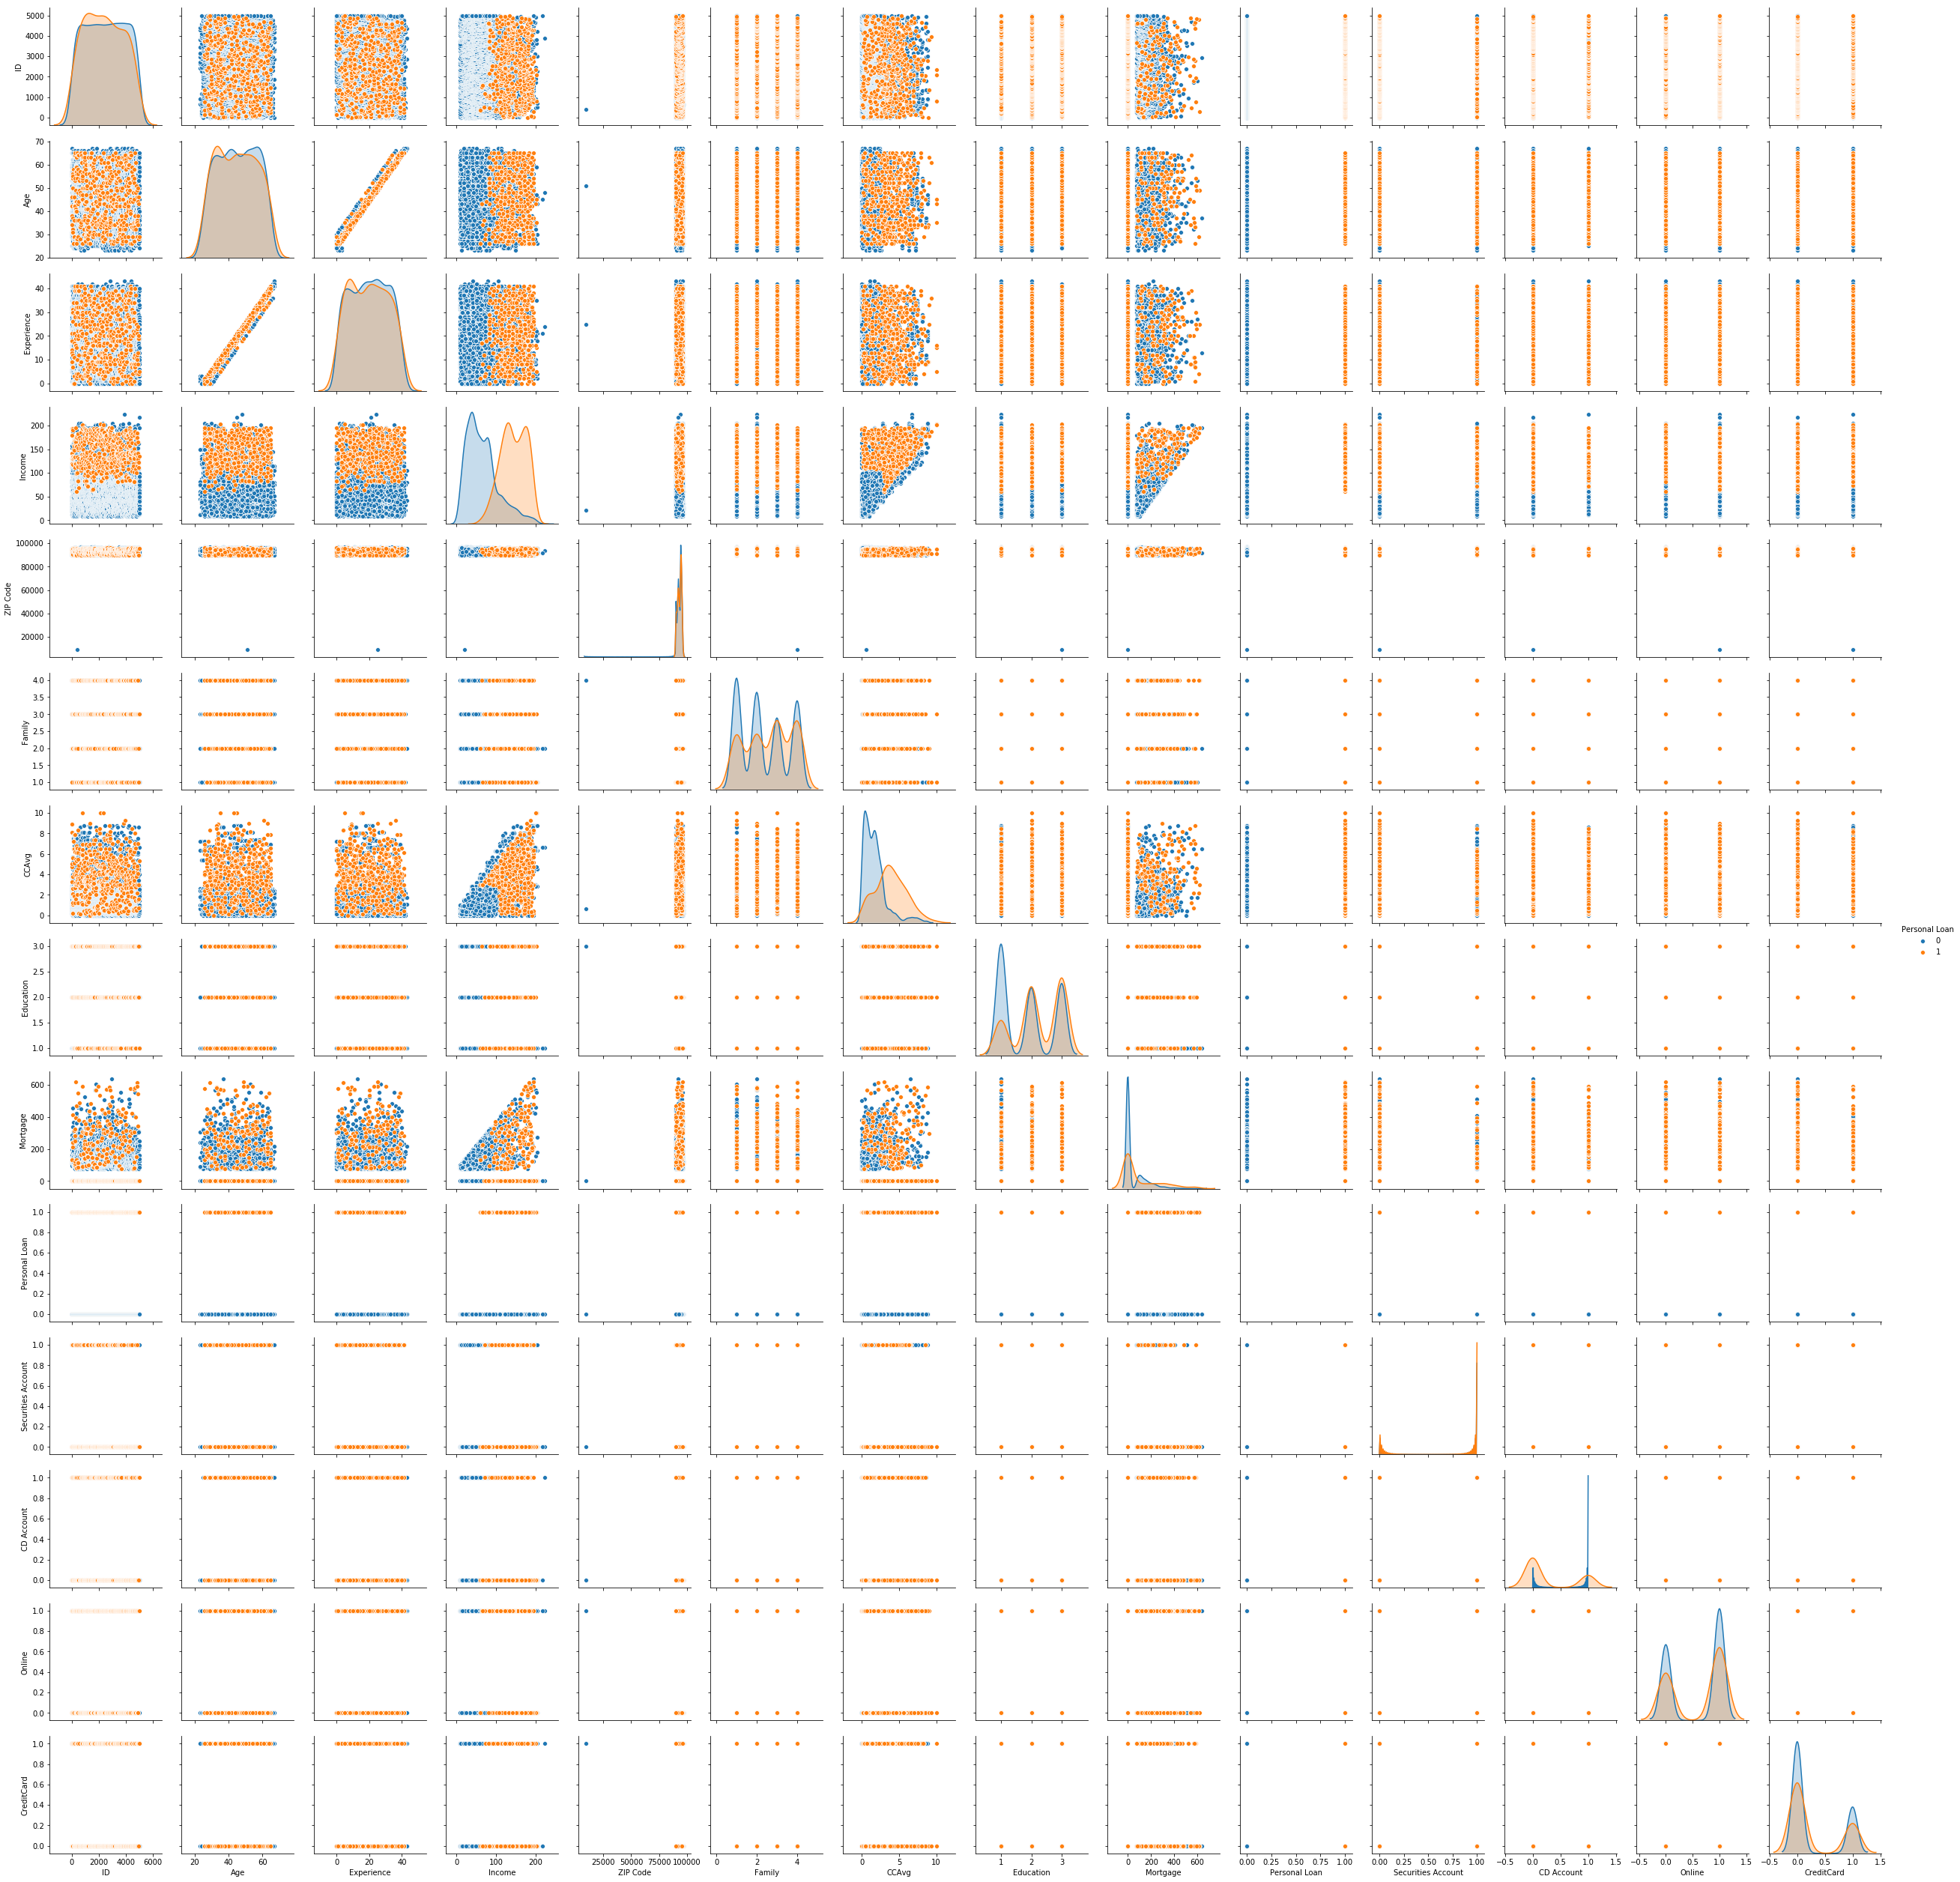

In [459]:
sns.pairplot(bank,hue='Personal Loan')

###### Distribution of attributes:
ID: ID is distributed normally since it is an incremental value. There is no distinction in range of customers IDs who took loan and who didn't. 

Age: Age is normally distributed among customers. If we see the age of customers who took loan and who didn't, it is also pretty much distrubted normally in all the age groups with little high chance of taking loan in lower age.

Experience: Experience is also normally distributed among customers. Experience is highly positively correlated with Age which is obvious that if you have low age, you tend to get less experience. and hence we see almost same distribution of customers who took loan vs who didn't as it was in age. Customers who has low experience are having a little high chance to take loan. Means they tend to take loan in their early age so that they can deposit EMIs in the tenure of their employement only.   

Income: Distribution of Income is different in customers who took loan and who didn't. Customers having low income are more tend to not taking the loans. Interesting thing to see that there is no correlation between income and age or experience. Even people are earning high in low age or experience. 

Zip Code: Most of the customers are living in some neighbourhood areas only. Only few customers are from farthest areas who didnt take loan too.  

Family: Cutomers are normally almost distributed among family size of 1,2,3 and 4. Families having size of 1 or 2 has almost double the chance of not taking loan. But family size 3 has equal probability of taking loan. Family size 4 is also on little high side of not taking loans. 

CCAvg: Average spending on credit card per month data is little bit right skewed where lower CreditcardAvg bill customers are less on taking loan whereas high spenders on credit card are more tend to take loans. Spending nature has no correlation with age or experience but has a very little positive correlation with income. 

Education: Data is normally distributed across under graduated, graduated and professional. Customers, who are under graduate only, are more tend to not taking the loan. For others, it is equal probability of taking loan or not.  

Mortgage: Mortgage data is highly right skewed. customers who are paying mortgage for their house are less likely to take loan. However low mortgage customers are taking loans over high mortgage customers. Income has weak positive correlation with mortgage where high income customers are paying high mortgage. They might have bought house in posh locality or big house hence they pay more mortgage.  

Personal Loan: This is an output field which we are targeting. 

Securities Account: Customers having security account are more tend to take loans. 

CD Account: Customers having certificate of deposit account are more tend to not take a loan. 

Online: Most of the customers use online banking. 

CreditCard: Few customers use the creditcard. 

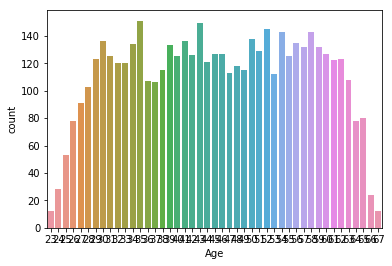

In [460]:
sns.countplot(bank['Age'])

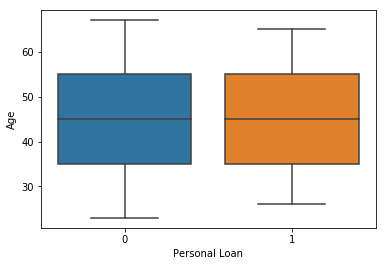

In [461]:
sns.boxplot(x=bank['Personal Loan'],y=bank['Age'])

Age is distributed normally in both the groups. 

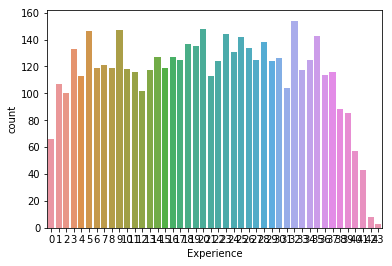

In [462]:
sns.countplot(bank['Experience'])

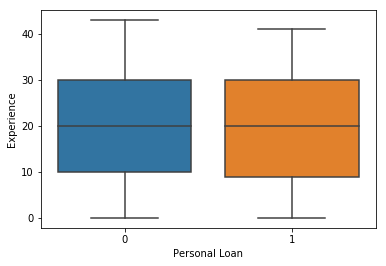

In [463]:
sns.boxplot(x=bank['Personal Loan'],y=bank['Experience'])

Experience is distributed normally in both the groups.

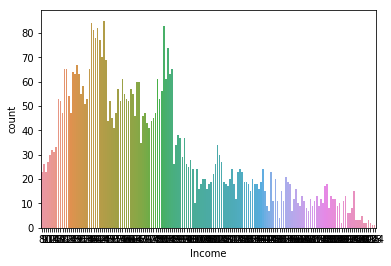

In [464]:
sns.countplot(bank['Income'])

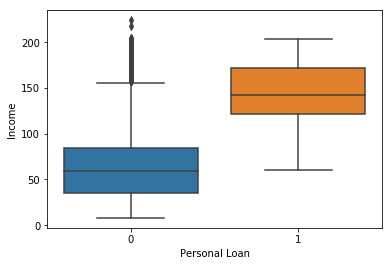

In [465]:
sns.boxplot(x=bank['Personal Loan'],y=bank['Income'])

Income is huge variance in both the groups and shows a good feature for Personal loan prediction. There are many outliers in the non personal loan group which infers that there are many people who has high income but still they didnt take loan. 

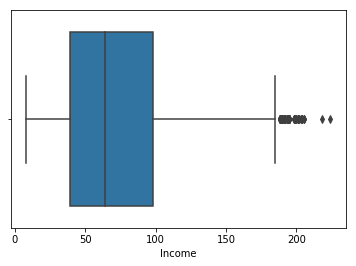

In [466]:
sns.boxplot(bank['Income'])

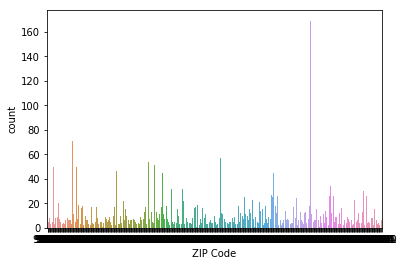

In [467]:
sns.countplot(bank['ZIP Code'])

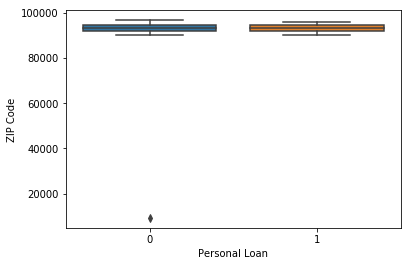

In [468]:
sns.boxplot(x=bank['Personal Loan'],y=bank['ZIP Code'])

Zip Code is also normally distributed except one outlier in a group. This doesnt look a good feature to use and can be dropped.  

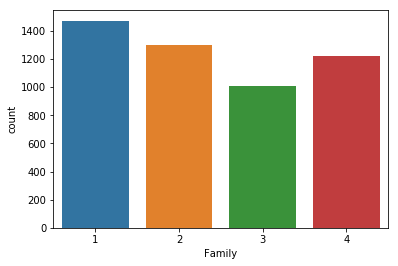

In [469]:
sns.countplot(bank['Family'])

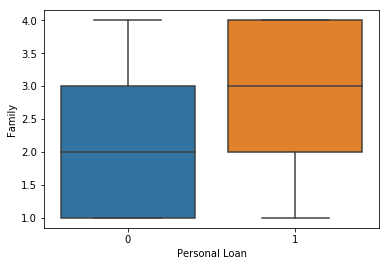

In [470]:
sns.boxplot(x=bank['Personal Loan'],y=bank['Family'])

Family also looks like a good feature to predict loan acceptance. As mean is 2 for the people not taking loans and is 3 for people taking loans. 

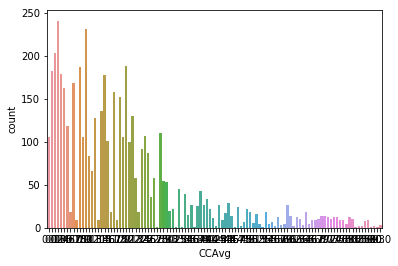

In [471]:
sns.countplot(bank['CCAvg'])

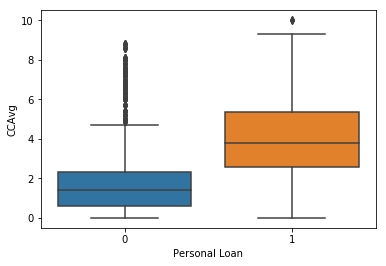

In [472]:
sns.boxplot(x=bank['Personal Loan'],y=bank['CCAvg'])

CCAvg also looks like a good feature to predict loan acceptance. Though there are many people who has high CCAvg stil they did not take loans.

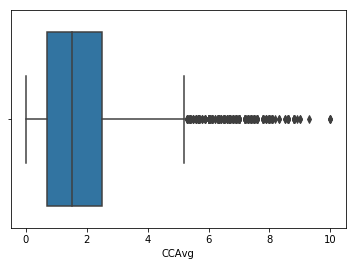

In [473]:
sns.boxplot(bank['CCAvg'])

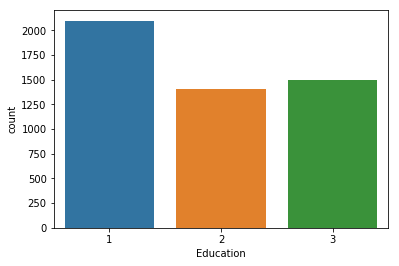

In [474]:
sns.countplot(bank['Education'])

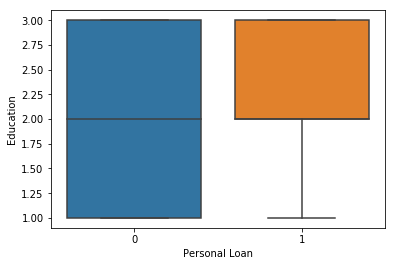

In [475]:
sns.boxplot(x=bank['Personal Loan'],y=bank['Education'])

Education can also contribute in predicting loan acceptance a bit. 

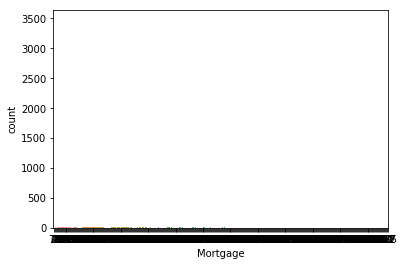

In [476]:
sns.countplot(bank['Mortgage'])

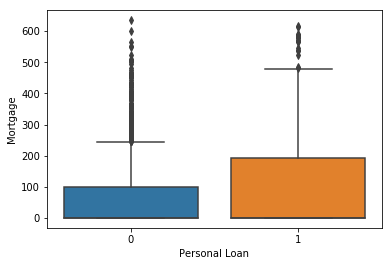

In [477]:
sns.boxplot(x=bank['Personal Loan'],y=bank['Mortgage'])

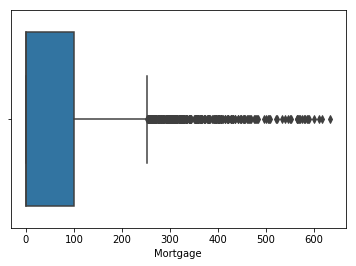

In [478]:
sns.boxplot(bank['Mortgage'])

Mortgage has a bunch of outliers. 

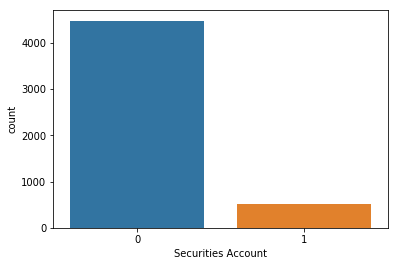

In [479]:
sns.countplot(bank['Securities Account'])

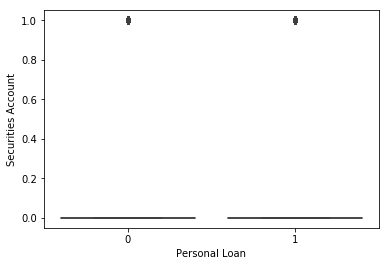

In [480]:
sns.boxplot(x=bank['Personal Loan'],y=bank['Securities Account'])

There are two values for securities account, either yes or no (0 or 1). Most of the people are having value 0 but few only has 1. 

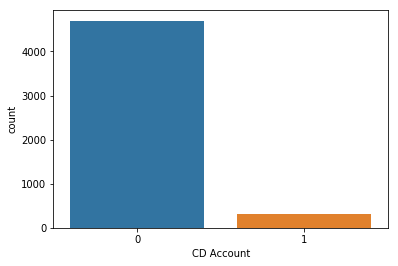

In [481]:
sns.countplot(bank['CD Account'])

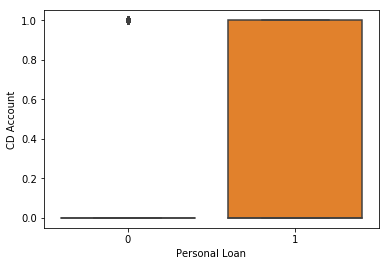

In [482]:
sns.boxplot(x=bank['Personal Loan'],y=bank['CD Account'])

Whoever does not have CD Account, most probably they didnt take loan too. 

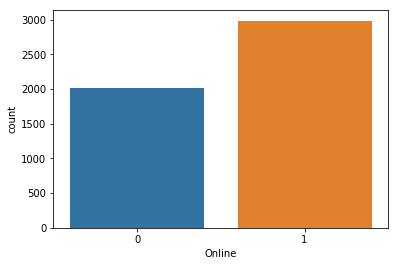

In [483]:
sns.countplot(bank['Online'])

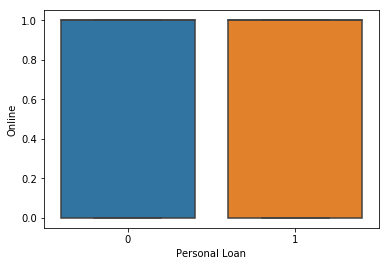

In [484]:
sns.boxplot(x=bank['Personal Loan'],y=bank['Online'])

Online doesnt look like a good feature to predict loan acceptance as there is no difference in their distibution towards personal loan. 

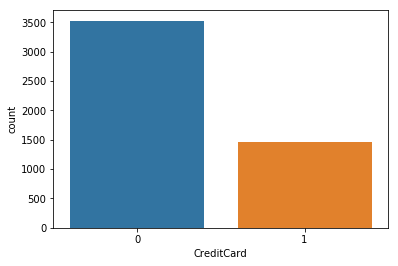

In [485]:
sns.countplot(bank['CreditCard'])

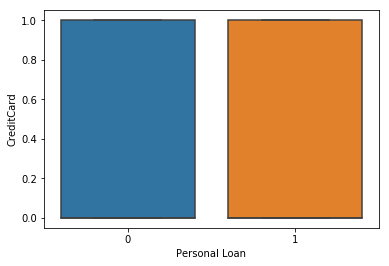

In [486]:
sns.boxplot(x=bank['Personal Loan'],y=bank['CreditCard'])

Credit Card doesnt look like a good feature to predict loan acceptance as there is no difference in their distibution towards personal loan. 

### Target coulmn distribution

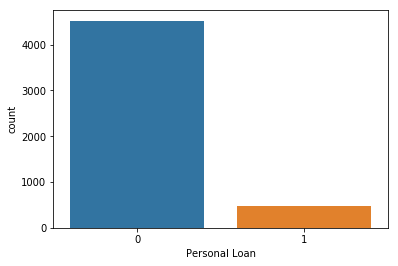

In [487]:
sns.countplot(bank['Personal Loan'])

In [488]:
bank['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

###### only 480 customers accepted loan in last campaign. This is the target field which we want to predict for our next campaign.

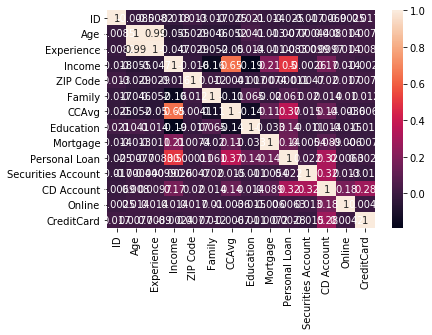

In [489]:
sns.heatmap(bank.corr(),annot=True)

Here also we can see that ZIP Code is not have correlation with any of the features or target variable. Hence we are dropping it.

In [490]:
bank.drop(columns='ZIP Code', axis=1, inplace=True)
bank.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1


Adding new feature to see if correlation gets better. 

In [491]:
bank['IncomePFM']=bank['Income']/bank['Family']

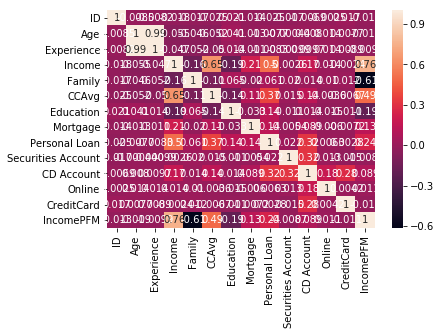

In [492]:
sns.heatmap(bank.corr(),annot=True)

In [493]:
bank['Savings']=bank['IncomePFM']-bank['CCAvg']-bank['Mortgage']

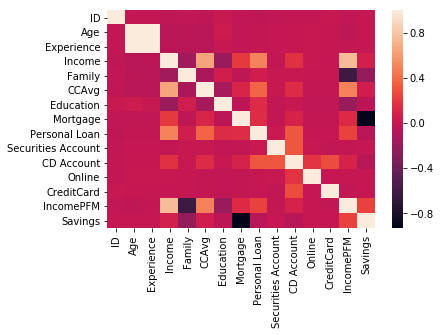

In [494]:
sns.heatmap(bank.corr())

It doesnt seem to be much much or any improvement in correlation by using these two new added features against target variable but might impact accuracy when used with other features. 

### Training and test data split

###### removing ID column as it is incremental ID and has no impact on prediction. 

In [497]:
#Independent variables
X=bank.drop(['ID','Personal Loan'],axis=1)

In [498]:
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,IncomePFM,Savings
0,25,1,49,4,1.6,1,0,1,0,0,0,12.250000,10.650000
1,45,19,34,3,1.5,1,0,1,0,0,0,11.333333,9.833333
2,39,15,11,1,1.0,1,0,0,0,0,0,11.000000,10.000000
3,35,9,100,1,2.7,2,0,0,0,0,0,100.000000,97.300000
4,35,8,45,4,1.0,2,0,0,0,0,1,11.250000,10.250000


In [499]:
#Dependent/target variable
y=bank['Personal Loan']

In [500]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [501]:
#train test data split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30,random_state=1)

In [502]:
print('training set size:', X_train.shape , y_train.shape)
print('testing set size:', X_test.shape , y_test.shape)

training set size: (3500, 13) (3500,)
testing set size: (1500, 13) (1500,)


### Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans

###### Logistic Regression for classification model

In [503]:
LR = LogisticRegression()

In [504]:
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [505]:
expected = y_test
predicted = LR.predict(X_test) 

In [506]:
print('classification report using Logistic Regression Model:')
print(metrics.classification_report(expected, predicted))

classification report using Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.85      0.56      0.67       149

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.90      0.77      0.82      1500
weighted avg       0.94      0.95      0.94      1500



In [507]:
print('Confusion Matrix using Logistic Regression Model:')
print(metrics.confusion_matrix(expected,predicted))

Confusion Matrix using Logistic Regression Model:
[[1336   15]
 [  66   83]]


Using CV

In [508]:
LR_accuracy = cross_val_score(LR, X_train, y_train, cv=10, scoring='accuracy')
LR_accuracy=LR_accuracy.mean()
print ("Accuracy score by using Logistic Regression model", LR_accuracy)
LR_precision = cross_val_score(LR, X_train, y_train, cv=10, scoring='precision')
LR_precision=LR_precision.mean()
print ("Precision score by using Logistic Regression model", LR_precision)
LR_recall = cross_val_score(LR, X_train, y_train, cv=10, scoring='recall')
LR_recall=LR_recall.mean()
print ("Recall score by using Logistic Regression model", LR_recall)
LR_f1 = cross_val_score(LR, X_train, y_train, cv=10, scoring='f1')
LR_f1=LR_f1.mean()
print ("F1 score by using Logistic Regression model", LR_f1)

Accuracy score by using Logistic Regression model 0.9511411451755292
Precision score by using Logistic Regression model 0.8227782587782588
Recall score by using Logistic Regression model 0.6221033868092694
F1 score by using Logistic Regression model 0.70605319256252


###### KNN for classification model

###### For KNN Model, we need to do first scaling to get the correct results.  

In [510]:
sc=preprocessing.StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)

In [511]:
myList = list(range(1,20))
# empty list that will hold cv scores
cv_scores = []
k_values = []
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, scaledX_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_values.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of K is %d" % best_k)

The optimal number of K is 1


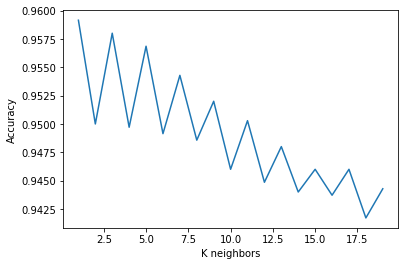

In [512]:
# plot misclassification error vs k
plt.plot(k_values, cv_scores)
plt.xlabel('K neighbors')
plt.ylabel('Accuracy')
plt.show()

In [513]:
myList = list(range(1,20))
# empty list that will hold cv scores
cv_scores = []
k_values = []
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, scaledX_train, y_train, cv=10, scoring='precision')
    cv_scores.append(scores.mean())
    k_values.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of K is %d" % best_k)

The optimal number of K is 2


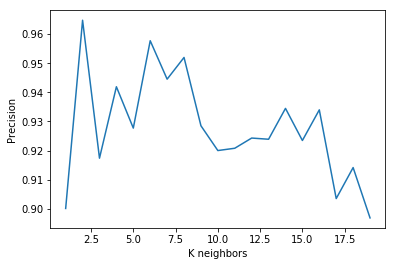

In [514]:
# plot misclassification error vs k
plt.plot(k_values, cv_scores)
plt.xlabel('K neighbors')
plt.ylabel('Precision')
plt.show()

In [515]:
myList = list(range(1,20))
# empty list that will hold cv scores
cv_scores = []
k_values = []
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, scaledX_train, y_train, cv=10, scoring='recall')
    cv_scores.append(scores.mean())
    k_values.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of K is %d" % best_k)

The optimal number of K is 1


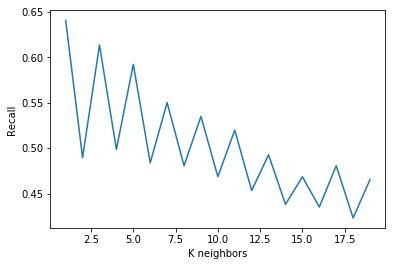

In [516]:
# plot misclassification error vs k
plt.plot(k_values, cv_scores)
plt.xlabel('K neighbors')
plt.ylabel('Recall')
plt.show()

In [517]:
myList = list(range(1,20))
# empty list that will hold cv scores
cv_scores = []
k_values = []
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, scaledX_train, y_train, cv=10, scoring='f1')
    cv_scores.append(scores.mean())
    k_values.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of K is %d" % best_k)

The optimal number of K is 1


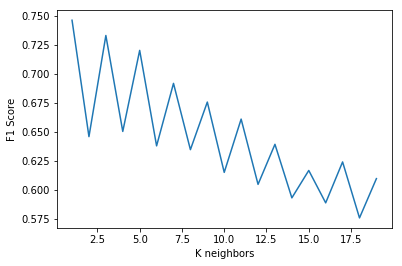

In [518]:
# plot misclassification error vs k
plt.plot(k_values, cv_scores)
plt.xlabel('K neighbors')
plt.ylabel('F1 Score')
plt.show()

###### As f1 score is showing best k as 1, which could be overfitting hence taking next highest which is 3 so we will go ahead with it as we give f1 score a first preference.

building final model

In [519]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(scaledX_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [520]:
knn.score(scaledX_test,y_test)

0.95

In [521]:
print('classification report using KNN Classifier Model:')
print(metrics.classification_report(y_test, knn.predict(scaledX_test)))

classification report using KNN Classifier Model:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.89      0.57      0.69       149

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.92      0.78      0.83      1500
weighted avg       0.95      0.95      0.95      1500



In [522]:
print('Confusion Matrix using KNN Classifier Model:')
print(metrics.confusion_matrix(y_test, knn.predict(scaledX_test)))

Confusion Matrix using KNN Classifier Model:
[[1340   11]
 [  64   85]]


Using CV

In [523]:
KNN_accuracy = cross_val_score(knn, scaledX_train, y_train, cv=10, scoring='accuracy')
KNN_accuracy=KNN_accuracy.mean()
print ("Accuracy score by using KNN Classifier model", KNN_accuracy)
KNN_precision = cross_val_score(knn, scaledX_train, y_train, cv=10, scoring='precision')
KNN_precision=KNN_precision.mean()
print ("Precision score by using KNN Classifier model", KNN_precision)
KNN_recall = cross_val_score(knn, scaledX_train, y_train, cv=10, scoring='recall')
KNN_recall=KNN_recall.mean()
print ("Recall score by using KNN Classifier model", KNN_recall)
KNN_f1 = cross_val_score(knn, scaledX_train, y_train, cv=10, scoring='f1')
KNN_f1=KNN_f1.mean()
print ("F1 score by using KNN Classifier model", KNN_f1)

Accuracy score by using KNN Classifier model 0.9580064560293786
Precision score by using KNN Classifier model 0.9173732981993853
Recall score by using KNN Classifier model 0.6134581105169341
F1 score by using KNN Classifier model 0.7333037230731263


### Naive Bayes classification

In [524]:
NB = GaussianNB()

In [525]:
NB.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [526]:
NB.score(X_test,y_test)

0.8726666666666667

In [527]:
print('classification report using Naive Bayes Model:')
print(metrics.classification_report(y_test, NB.predict(X_test)))

classification report using Naive Bayes Model:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1351
           1       0.41      0.62      0.49       149

   micro avg       0.87      0.87      0.87      1500
   macro avg       0.68      0.76      0.71      1500
weighted avg       0.90      0.87      0.88      1500



In [528]:
print('Confusion Matrix using Naive Bayes Model:')
print(metrics.confusion_matrix(y_test, NB.predict(X_test)))

Confusion Matrix using Naive Bayes Model:
[[1217  134]
 [  57   92]]


Using CV

In [529]:
NB_accuracy = cross_val_score(NB, X_train, y_train, cv=10, scoring='accuracy')
NB_accuracy=NB_accuracy.mean()
print ("Accuracy score by using Naive Bayes model", NB_accuracy)
NB_precision = cross_val_score(NB, X_train, y_train, cv=10, scoring='precision')
NB_precision=NB_precision.mean()
print ("Precision score by using Naive Bayes model", NB_precision)
NB_recall = cross_val_score(NB, X_train, y_train, cv=10, scoring='recall')
NB_recall=NB_recall.mean()
print ("Recall score by using Naive Bayes model", NB_recall)
NB_f1 = cross_val_score(NB, X_train, y_train, cv=10, scoring='f1')
NB_f1=NB_f1.mean()
print ("F1 score by using Naive Bayes model", NB_f1)

Accuracy score by using Naive Bayes model 0.8737214344606894
Precision score by using Naive Bayes model 0.3957313898556202
Recall score by using Naive Bayes model 0.6285204991087345
F1 score by using Naive Bayes model 0.4848521564010072


### Evaluating the performance

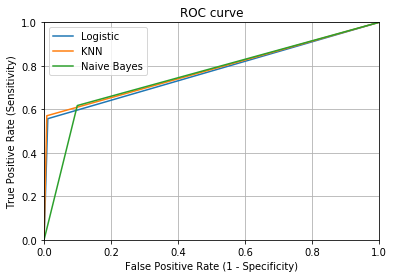

In [530]:
import matplotlib.pyplot as plt
LR_fpr, LR_tpr, LR_thresholds = metrics.roc_curve(y_test, LR.predict(X_test))
KNN_fpr, KNN_tpr, KNN_thresholds = metrics.roc_curve(y_test, knn.predict(scaledX_test))
NB_fpr, NB_tpr, NB_thresholds = metrics.roc_curve(y_test, NB.predict(X_test))
plt.plot(LR_fpr, LR_tpr,label='Logistic')
plt.plot(KNN_fpr, KNN_tpr, label='KNN')
plt.plot(NB_fpr, NB_tpr, label='Naive Bayes')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.legend()

In [531]:
def evaluate_threshold(fpr,tpr,thresholds,threshold):
    print ('Sensitivity:', tpr[thresholds>threshold][-1])
    print ('Specificity:', 1-fpr[thresholds>threshold][-1])

In [532]:
print('LR - with all features: ')
evaluate_threshold(LR_fpr, LR_tpr, LR_thresholds,0.5)
print('F1 Score:' , metrics.f1_score(y_test, LR.predict(X_test)))
print('AUC Score:' , metrics.auc(LR_fpr, LR_tpr))


print('\n\nKNN - with all features: ')
evaluate_threshold(KNN_fpr, KNN_tpr, KNN_thresholds,0.5)
print('F1 Score:' , metrics.f1_score(y_test, knn.predict(scaledX_test)))
print('AUC Score :' , metrics.auc(KNN_fpr, KNN_tpr))


print('\n\nNB - with all features: ')
evaluate_threshold(NB_fpr, NB_tpr, NB_thresholds,0.5)
print('F1 Score:' , metrics.f1_score(y_test, NB.predict(X_test)))
print('AUC Score :' , metrics.auc(NB_fpr, NB_tpr))

LR - with all features: 
Sensitivity: 0.5570469798657718
Specificity: 0.9888971132494448
F1 Score: 0.6720647773279351
AUC Score: 0.7729720465576083


KNN - with all features: 
Sensitivity: 0.5704697986577181
Specificity: 0.9918578830495929
F1 Score: 0.6938775510204079
AUC Score : 0.7811638408536555


NB - with all features: 
Sensitivity: 0.6174496644295302
Specificity: 0.9008142116950407
F1 Score: 0.49066666666666675
AUC Score : 0.7591319380622855


### KNN is showing highest AUC and F1 score hence KNN is best model here to predict personal loan acceptance. 

Let's see if score improves with feature selection.

### Feature Selection

### Logistic Regression: 

###### Select optimal set of features using forward selection:

In [533]:
LRsfs1 = sfs(LR, k_features=10, forward=True, scoring='accuracy', cv=5)
LRsfs1 = LRsfs1.fit(X_train.values, y_train.values)
LRsfs1.get_metric_dict()

{1: {'feature_idx': (2,),
  'cv_scores': array([0.91868759, 0.90428571, 0.90714286, 0.90428571, 0.90844063]),
  'avg_score': 0.9085685008686607,
  'feature_names': ('2',),
  'ci_bound': 0.006828495080352133,
  'std_dev': 0.0053128011589350845,
  'std_err': 0.0026564005794675423},
 2: {'feature_idx': (2, 5),
  'cv_scores': array([0.94579173, 0.93142857, 0.94285714, 0.93714286, 0.93991416]),
  'avg_score': 0.9394268921248526,
  'feature_names': ('2', '5'),
  'ci_bound': 0.006341191243701494,
  'std_dev': 0.004933662218707933,
  'std_err': 0.0024668311093539665},
 3: {'feature_idx': (2, 5, 11),
  'cv_scores': array([0.94436519, 0.94142857, 0.94571429, 0.93571429, 0.94420601]),
  'avg_score': 0.942285668804572,
  'feature_names': ('2', '5', '11'),
  'ci_bound': 0.004587074524369563,
  'std_dev': 0.003568899817957472,
  'std_err': 0.0017844499089787358},
 4: {'feature_idx': (2, 5, 8, 11),
  'cv_scores': array([0.95292439, 0.94285714, 0.94857143, 0.94285714, 0.94849785]),
  'avg_score': 0.94

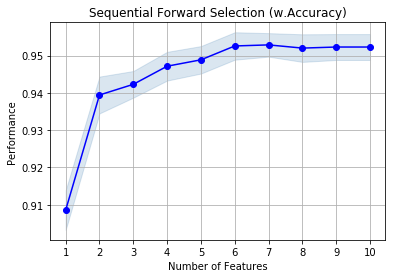

In [534]:
fig = plot_sfs(LRsfs1.get_metric_dict())
plt.title('Sequential Forward Selection (w.Accuracy)')
plt.grid()
plt.show()

###### after looking at 10 features, it looks like 5 is the ideal feature number here to pick.

Just running the feature selection agian using features as 5 to get exact feature column names. 

In [535]:
LRsfs1 = sfs(LR, k_features=5, forward=True, scoring='accuracy', cv=5)
LRsfs1 = LRsfs1.fit(X_train.values, y_train.values)
LRsfs1.get_metric_dict()

{1: {'feature_idx': (2,),
  'cv_scores': array([0.91868759, 0.90428571, 0.90714286, 0.90428571, 0.90844063]),
  'avg_score': 0.9085685008686607,
  'feature_names': ('2',),
  'ci_bound': 0.006828495080352133,
  'std_dev': 0.0053128011589350845,
  'std_err': 0.0026564005794675423},
 2: {'feature_idx': (2, 5),
  'cv_scores': array([0.94579173, 0.93142857, 0.94285714, 0.93714286, 0.93991416]),
  'avg_score': 0.9394268921248526,
  'feature_names': ('2', '5'),
  'ci_bound': 0.006341191243701494,
  'std_dev': 0.004933662218707933,
  'std_err': 0.0024668311093539665},
 3: {'feature_idx': (2, 5, 11),
  'cv_scores': array([0.94436519, 0.94142857, 0.94571429, 0.93571429, 0.94420601]),
  'avg_score': 0.942285668804572,
  'feature_names': ('2', '5', '11'),
  'ci_bound': 0.004587074524369563,
  'std_dev': 0.003568899817957472,
  'std_err': 0.0017844499089787358},
 4: {'feature_idx': (2, 5, 8, 11),
  'cv_scores': array([0.95292439, 0.94285714, 0.94857143, 0.94285714, 0.94849785]),
  'avg_score': 0.94

In [536]:
ColumnList = list(X_train.columns)
print(ColumnList)
feat_cols = list(LRsfs1.k_feature_idx_)
print(feat_cols)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'IncomePFM', 'Savings']
[2, 5, 8, 10, 11]


In [537]:
LR_subsetColumnList = [ColumnList[i] for i in feat_cols]
print(LR_subsetColumnList)

['Income', 'Education', 'CD Account', 'CreditCard', 'IncomePFM']


###### Select optimal set of features using Backward selection:

In [538]:
#Backward feature selection:
LRsfs2 = sfs(LR, k_features=1, forward=False, floating=True, scoring='accuracy', cv=5)
LRsfs2 = LRsfs2.fit(X_train.values, y_train.values)
LRsfs2.get_metric_dict()

{13: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.95577746, 0.95285714, 0.95142857, 0.95285714, 0.94563662]),
  'avg_score': 0.9517113883322794,
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   '10',
   '11',
   '12'),
  'ci_bound': 0.004306825645441913,
  'std_dev': 0.003350856669176247,
  'std_err': 0.0016754283345881236},
 12: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12),
  'cv_scores': array([0.95435093, 0.95428571, 0.95285714, 0.95428571, 0.94563662]),
  'avg_score': 0.9522832244847146,
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '8',
   '9',
   '10',
   '11',
   '12'),
  'ci_bound': 0.004332098128793333,
  'std_dev': 0.0033705195198129754,
  'std_err': 0.0016852597599064875},
 11: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11),
  'cv_scores': array([0.95435093, 0.95428571, 0.95285714, 0.95428571, 0.94563662]),
  'avg_score': 0.9522832244847146,

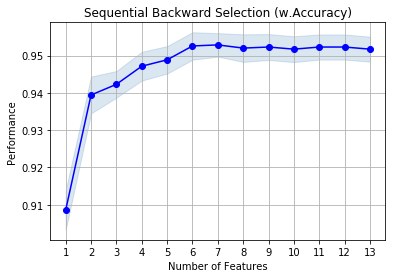

In [539]:
fig = plot_sfs(LRsfs2.get_metric_dict())
plt.title('Sequential Backward Selection (w.Accuracy)')
plt.grid()
plt.show()

With backward selection also, performance looks good with feature number 5. 

In [540]:
#getting exact 5 features in backward feature selection
LRsfs2 = sfs(LR, k_features=5, forward=False, floating=True, scoring='accuracy', cv=5)
LRsfs2 = LRsfs2.fit(X_train.values, y_train.values)
LRsfs2.get_metric_dict()

{13: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.95577746, 0.95285714, 0.95142857, 0.95285714, 0.94563662]),
  'avg_score': 0.9517113883322794,
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   '10',
   '11',
   '12'),
  'ci_bound': 0.004306825645441913,
  'std_dev': 0.003350856669176247,
  'std_err': 0.0016754283345881236},
 12: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12),
  'cv_scores': array([0.95435093, 0.95428571, 0.95285714, 0.95428571, 0.94563662]),
  'avg_score': 0.9522832244847146,
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '8',
   '9',
   '10',
   '11',
   '12'),
  'ci_bound': 0.004332098128793333,
  'std_dev': 0.0033705195198129754,
  'std_err': 0.0016852597599064875},
 11: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11),
  'cv_scores': array([0.95435093, 0.95428571, 0.95285714, 0.95428571, 0.94563662]),
  'avg_score': 0.9522832244847146,

In [541]:
feat_cols_b = list(LRsfs2.k_feature_idx_)
print(feat_cols_b)
LR_subsetColumnList_b = [ColumnList[i] for i in feat_cols_b]
print(LR_subsetColumnList_b)

[2, 5, 8, 10, 11]
['Income', 'Education', 'CD Account', 'CreditCard', 'IncomePFM']


###### Even in backward selection we see the same set of columns. Hence we will get the same scores in both the feature selection mechnism for Logistic Regression. 

Previous score values with all features:

In [542]:
#with all the features
print(metrics.classification_report(y_test, LR.predict(X_test)))
print('Confusion Matrix for Logistic Regression with all features:')
print(metrics.confusion_matrix(y_test, LR.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.85      0.56      0.67       149

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.90      0.77      0.82      1500
weighted avg       0.94      0.95      0.94      1500

Confusion Matrix for Logistic Regression with all features:
[[1336   15]
 [  66   83]]


retraining the Linear Regression model with feature selection

In [543]:
LR1 = LogisticRegression()
LR1.fit(X_train[LR_subsetColumnList],y_train)
LR1.score(X_test[LR_subsetColumnList],y_test)

0.944

In [544]:
print(metrics.classification_report(y_test, LR1.predict(X_test[LR_subsetColumnList])))
print('Confusion Matrix for Logistic Regression with selected features:')
print(metrics.confusion_matrix(y_test, LR1.predict(X_test[LR_subsetColumnList])))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.86      0.52      0.65       149

   micro avg       0.94      0.94      0.94      1500
   macro avg       0.90      0.76      0.81      1500
weighted avg       0.94      0.94      0.94      1500

Confusion Matrix for Logistic Regression with selected features:
[[1338   13]
 [  71   78]]


We can see that scores for taking loan has increased almost double. 

### KNN Classifier: 

###### Select optimal set of features using forward selection:

In [545]:
KNNsfs1 = sfs(knn, k_features=10, forward=True, scoring='accuracy', cv=5)
KNNsfs1 = KNNsfs1.fit(scaledX_train, y_train)
KNNsfs1.get_metric_dict()

{1: {'feature_idx': (4,),
  'cv_scores': array([0.90870185, 0.91285714, 0.89714286, 0.89857143, 0.91130186]),
  'avg_score': 0.9057150285729445,
  'feature_names': ('4',),
  'ci_bound': 0.00844107905017791,
  'std_dev': 0.006567446272237081,
  'std_err': 0.00328372313611854},
 2: {'feature_idx': (4, 5),
  'cv_scores': array([0.93865906, 0.95285714, 0.94714286, 0.95      , 0.95422031]),
  'avg_score': 0.948575874644642,
  'feature_names': ('4', '5'),
  'ci_bound': 0.007100900846249486,
  'std_dev': 0.0055247420993224106,
  'std_err': 0.002762371049661205},
 3: {'feature_idx': (2, 4, 5),
  'cv_scores': array([0.9657632 , 0.96714286, 0.96571429, 0.97142857, 0.96995708]),
  'avg_score': 0.9680011982531743,
  'feature_names': ('2', '4', '5'),
  'ci_bound': 0.002961626079624301,
  'std_dev': 0.002304245706119621,
  'std_err': 0.0011521228530598103},
 4: {'feature_idx': (2, 4, 5, 11),
  'cv_scores': array([0.9828816 , 0.98571429, 0.98      , 0.98857143, 0.98855508]),
  'avg_score': 0.98514447

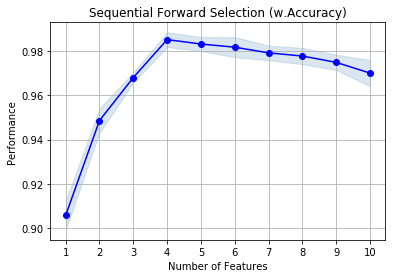

In [546]:
fig = plot_sfs(KNNsfs1.get_metric_dict())
plt.title('Sequential Forward Selection (w.Accuracy)')
plt.grid()
plt.show()

###### after looking at 10 features, it looks like 4 is the ideal feature number here to pick.

Just running the feature selection agian using features as 4 to get exact feature column names. 

In [547]:
KNNsfs1 = sfs(knn, k_features=4, forward=True, scoring='accuracy', cv=5)
KNNsfs1 = KNNsfs1.fit(scaledX_train, y_train)
KNNsfs1.get_metric_dict()

{1: {'feature_idx': (4,),
  'cv_scores': array([0.90870185, 0.91285714, 0.89714286, 0.89857143, 0.91130186]),
  'avg_score': 0.9057150285729445,
  'feature_names': ('4',),
  'ci_bound': 0.00844107905017791,
  'std_dev': 0.006567446272237081,
  'std_err': 0.00328372313611854},
 2: {'feature_idx': (4, 5),
  'cv_scores': array([0.93865906, 0.95285714, 0.94714286, 0.95      , 0.95422031]),
  'avg_score': 0.948575874644642,
  'feature_names': ('4', '5'),
  'ci_bound': 0.007100900846249486,
  'std_dev': 0.0055247420993224106,
  'std_err': 0.002762371049661205},
 3: {'feature_idx': (2, 4, 5),
  'cv_scores': array([0.9657632 , 0.96714286, 0.96571429, 0.97142857, 0.96995708]),
  'avg_score': 0.9680011982531743,
  'feature_names': ('2', '4', '5'),
  'ci_bound': 0.002961626079624301,
  'std_dev': 0.002304245706119621,
  'std_err': 0.0011521228530598103},
 4: {'feature_idx': (2, 4, 5, 11),
  'cv_scores': array([0.9828816 , 0.98571429, 0.98      , 0.98857143, 0.98855508]),
  'avg_score': 0.98514447

In [548]:
ColumnList = list(X_train.columns)
print(ColumnList)
feat_cols = list(KNNsfs1.k_feature_idx_)
print(feat_cols)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'IncomePFM', 'Savings']
[2, 4, 5, 11]


In [549]:
KNN_subsetColumnList = [ColumnList[i] for i in feat_cols]
print(KNN_subsetColumnList)

['Income', 'CCAvg', 'Education', 'IncomePFM']


### Select optimal set of features using Backward selection:

In [550]:
#Backward feature selection:
KNNsfs2 = sfs(knn, k_features=1, forward=False, floating=True, scoring='accuracy', cv=5)
KNNsfs2 =KNNsfs2.fit(scaledX_train, y_train)
KNNsfs2.get_metric_dict()

{13: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.95863053, 0.94857143, 0.94857143, 0.96142857, 0.96423462]),
  'avg_score': 0.9562873154551628,
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   '10',
   '11',
   '12'),
  'ci_bound': 0.008411591134968066,
  'std_dev': 0.006544503672402424,
  'std_err': 0.003272251836201212},
 12: {'feature_idx': (0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.96433666, 0.95714286, 0.95142857, 0.96428571, 0.96995708]),
  'avg_score': 0.9614301772627524,
  'feature_names': ('0',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   '10',
   '11',
   '12'),
  'ci_bound': 0.008284357034515282,
  'std_dev': 0.006445511219689586,
  'std_err': 0.003222755609844793},
 11: {'feature_idx': (2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.9743224 , 0.95857143, 0.95571429, 0.96428571, 0.96995708]),
  'avg_score': 0.9645701813385624,
 

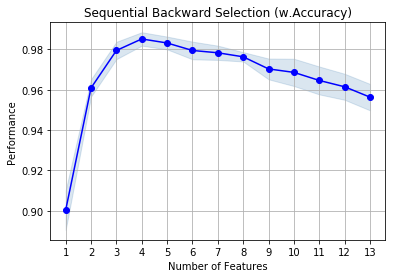

In [551]:
fig = plot_sfs(KNNsfs2.get_metric_dict())
plt.title('Sequential Backward Selection (w.Accuracy)')
plt.grid()
plt.show()

With backward selection also, performance looks good with feature number 4. 

In [552]:
#getting exact 4 features in backward feature selection
KNNsfs2 = sfs(knn, k_features=4, forward=False, floating=True, scoring='accuracy', cv=5)
KNNsfs2 = KNNsfs2.fit(scaledX_train, y_train)
KNNsfs2.get_metric_dict()

{13: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.95863053, 0.94857143, 0.94857143, 0.96142857, 0.96423462]),
  'avg_score': 0.9562873154551628,
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   '10',
   '11',
   '12'),
  'ci_bound': 0.008411591134968066,
  'std_dev': 0.006544503672402424,
  'std_err': 0.003272251836201212},
 12: {'feature_idx': (0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.96433666, 0.95714286, 0.95142857, 0.96428571, 0.96995708]),
  'avg_score': 0.9614301772627524,
  'feature_names': ('0',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   '10',
   '11',
   '12'),
  'ci_bound': 0.008284357034515282,
  'std_dev': 0.006445511219689586,
  'std_err': 0.003222755609844793},
 11: {'feature_idx': (2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.9743224 , 0.95857143, 0.95571429, 0.96428571, 0.96995708]),
  'avg_score': 0.9645701813385624,
 

In [553]:
feat_cols_b = list(KNNsfs2.k_feature_idx_)
print(feat_cols_b)
KNN_subsetColumnList_b = [ColumnList[i] for i in feat_cols_b]
print(KNN_subsetColumnList_b)

[2, 4, 5, 11]
['Income', 'CCAvg', 'Education', 'IncomePFM']


###### Even in backward selection we see the same set of columns. Hence we will get the same scores in both the feature selection mechnism for KNN Classifier model. 

Previous score values with all features:

In [554]:
#with all the features
print(metrics.classification_report(y_test,knn.predict(scaledX_test)))
print('Confusion Matrix for KNN with all features:')
print(metrics.confusion_matrix(y_test, knn.predict(scaledX_test)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.89      0.57      0.69       149

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.92      0.78      0.83      1500
weighted avg       0.95      0.95      0.95      1500

Confusion Matrix for KNN with all features:
[[1340   11]
 [  64   85]]


retraining the KNN model with feature selection

In [555]:
knn1 = KNeighborsClassifier()
knn1.fit(scaledX_train[:,KNNsfs1.k_feature_idx_],y_train)
knn1.score(scaledX_test[:,KNNsfs1.k_feature_idx_],y_test)

0.9793333333333333

In [556]:
print(metrics.classification_report(y_test, knn1.predict(scaledX_test[:,KNNsfs1.k_feature_idx_])))
print('Confusion Matrix for KNN with selected features:')
print(metrics.confusion_matrix(y_test, knn1.predict(scaledX_test[:,KNNsfs1.k_feature_idx_])))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1351
           1       0.96      0.83      0.89       149

   micro avg       0.98      0.98      0.98      1500
   macro avg       0.97      0.91      0.94      1500
weighted avg       0.98      0.98      0.98      1500

Confusion Matrix for KNN with selected features:
[[1346    5]
 [  26  123]]


We can see that scores for taking loan has increased after feature selection. 

### Naive Bayes: 

###### Select optimal set of features using forward selection:

In [557]:
NBsfs1 = sfs(NB, k_features=10, forward=True, scoring='accuracy', cv=5)
NBsfs1 = NBsfs1.fit(X_train.values, y_train.values)
NBsfs1.get_metric_dict()

{1: {'feature_idx': (0,),
  'cv_scores': array([0.90442225, 0.90571429, 0.90571429, 0.90571429, 0.9055794 ]),
  'avg_score': 0.9054289020414912,
  'feature_names': ('0',),
  'ci_bound': 0.000650393103872908,
  'std_dev': 0.0005060279308045109,
  'std_err': 0.00025301396540225544},
 2: {'feature_idx': (0, 1),
  'cv_scores': array([0.90442225, 0.90571429, 0.90571429, 0.90571429, 0.9055794 ]),
  'avg_score': 0.9054289020414912,
  'feature_names': ('0', '1'),
  'ci_bound': 0.000650393103872908,
  'std_dev': 0.0005060279308045109,
  'std_err': 0.00025301396540225544},
 3: {'feature_idx': (0, 1, 3),
  'cv_scores': array([0.90442225, 0.90571429, 0.90571429, 0.90571429, 0.9055794 ]),
  'avg_score': 0.9054289020414912,
  'feature_names': ('0', '1', '3'),
  'ci_bound': 0.000650393103872908,
  'std_dev': 0.0005060279308045109,
  'std_err': 0.00025301396540225544},
 4: {'feature_idx': (0, 1, 2, 3),
  'cv_scores': array([0.91440799, 0.89714286, 0.90142857, 0.90142857, 0.91845494]),
  'avg_score': 0

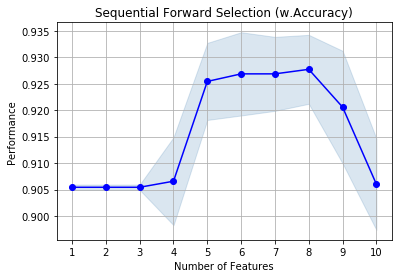

In [558]:
fig = plot_sfs(NBsfs1.get_metric_dict())
plt.title('Sequential Forward Selection (w.Accuracy)')
plt.grid()
plt.show()

###### after looking at 10 features, it looks like 6 is the ideal feature number here to pick.

Just running the feature selection agian using features as 6 to get exact feature column names. 

In [559]:
NBsfs1 = sfs(NB, k_features=6, forward=True, scoring='accuracy', cv=5)
NBsfs1 = NBsfs1.fit(X_train.values, y_train.values)
NBsfs1.get_metric_dict()

{1: {'feature_idx': (0,),
  'cv_scores': array([0.90442225, 0.90571429, 0.90571429, 0.90571429, 0.9055794 ]),
  'avg_score': 0.9054289020414912,
  'feature_names': ('0',),
  'ci_bound': 0.000650393103872908,
  'std_dev': 0.0005060279308045109,
  'std_err': 0.00025301396540225544},
 2: {'feature_idx': (0, 1),
  'cv_scores': array([0.90442225, 0.90571429, 0.90571429, 0.90571429, 0.9055794 ]),
  'avg_score': 0.9054289020414912,
  'feature_names': ('0', '1'),
  'ci_bound': 0.000650393103872908,
  'std_dev': 0.0005060279308045109,
  'std_err': 0.00025301396540225544},
 3: {'feature_idx': (0, 1, 3),
  'cv_scores': array([0.90442225, 0.90571429, 0.90571429, 0.90571429, 0.9055794 ]),
  'avg_score': 0.9054289020414912,
  'feature_names': ('0', '1', '3'),
  'ci_bound': 0.000650393103872908,
  'std_dev': 0.0005060279308045109,
  'std_err': 0.00025301396540225544},
 4: {'feature_idx': (0, 1, 2, 3),
  'cv_scores': array([0.91440799, 0.89714286, 0.90142857, 0.90142857, 0.91845494]),
  'avg_score': 0

In [560]:
ColumnList = list(X_train.columns)
print(ColumnList)
feat_cols = list(NBsfs1.k_feature_idx_)
print(feat_cols)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'IncomePFM', 'Savings']
[0, 1, 2, 3, 5, 9]


In [561]:
NB_subsetColumnList = [ColumnList[i] for i in feat_cols]
print(NB_subsetColumnList)

['Age', 'Experience', 'Income', 'Family', 'Education', 'Online']


###### Select optimal set of features using Backward selection:

In [562]:
#Backward feature selection:
NBsfs2 = sfs(NB, k_features=1, forward=False, floating=True, scoring='accuracy', cv=5)
NBsfs2 = NBsfs2.fit(X_train.values, y_train.values)
NBsfs2.get_metric_dict()

{13: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.87303852, 0.85857143, 0.87142857, 0.87857143, 0.88555079]),
  'avg_score': 0.8734321463629808,
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   '10',
   '11',
   '12'),
  'ci_bound': 0.011471304020040088,
  'std_dev': 0.008925064245491535,
  'std_err': 0.0044625321227457675},
 12: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12),
  'cv_scores': array([0.88302425, 0.86285714, 0.88428571, 0.89285714, 0.90271817]),
  'avg_score': 0.8851484839764978,
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   '10',
   '12'),
  'ci_bound': 0.016956858944170285,
  'std_dev': 0.013193012338795,
  'std_err': 0.0065965061693975},
 11: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12),
  'cv_scores': array([0.90442225, 0.88      , 0.90428571, 0.9       , 0.9055794 ]),
  'avg_score': 0.8988574734700625,
  'featu

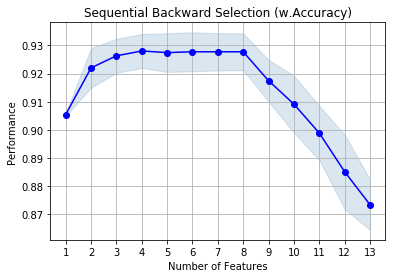

In [563]:
fig = plot_sfs(NBsfs2.get_metric_dict())
plt.title('Sequential Backward Selection (w.Accuracy)')
plt.grid()
plt.show()

With backward selection, performance looks good with feature number 4. 

In [564]:
#getting exact 4 features in backward feature selection
NBsfs2 = sfs(NB, k_features=4, forward=False, floating=True, scoring='accuracy', cv=5)
NBsfs2 = NBsfs2.fit(X_train.values, y_train.values)
NBsfs2.get_metric_dict()

{13: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.87303852, 0.85857143, 0.87142857, 0.87857143, 0.88555079]),
  'avg_score': 0.8734321463629808,
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   '10',
   '11',
   '12'),
  'ci_bound': 0.011471304020040088,
  'std_dev': 0.008925064245491535,
  'std_err': 0.0044625321227457675},
 12: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12),
  'cv_scores': array([0.88302425, 0.86285714, 0.88428571, 0.89285714, 0.90271817]),
  'avg_score': 0.8851484839764978,
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   '10',
   '12'),
  'ci_bound': 0.016956858944170285,
  'std_dev': 0.013193012338795,
  'std_err': 0.0065965061693975},
 11: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12),
  'cv_scores': array([0.90442225, 0.88      , 0.90428571, 0.9       , 0.9055794 ]),
  'avg_score': 0.8988574734700625,
  'featu

In [565]:
feat_cols_b = list(NBsfs2.k_feature_idx_)
print(feat_cols_b)
NB_subsetColumnList_b = [ColumnList[i] for i in feat_cols_b]
print(NB_subsetColumnList_b)

[2, 3, 5, 7]
['Income', 'Family', 'Education', 'Securities Account']


###### In backward selection we do not see the same set of columns. Hence we will get the scores in both the feature selection mechnism for Naive Bayes. 

Previous score values with all features:

In [566]:
#with all the features
print(metrics.classification_report(y_test, NB.predict(X_test)))
print('Confusion Matrix for Naive Bayes with all features:')
print(metrics.confusion_matrix(y_test, NB.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1351
           1       0.41      0.62      0.49       149

   micro avg       0.87      0.87      0.87      1500
   macro avg       0.68      0.76      0.71      1500
weighted avg       0.90      0.87      0.88      1500

Confusion Matrix for Naive Bayes with all features:
[[1217  134]
 [  57   92]]


retraining the Naive Bayes model with forward feature selection

In [567]:
NB1 = GaussianNB()
NB1.fit(X_train[NB_subsetColumnList],y_train)
NB1.score(X_test[NB_subsetColumnList],y_test)

0.9273333333333333

In [568]:
print(metrics.classification_report(y_test, NB1.predict(X_test[NB_subsetColumnList])))
print('Confusion Matrix for Naive Bayes with forward feature selection:')
print(metrics.confusion_matrix(y_test, NB1.predict(X_test[NB_subsetColumnList])))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1351
           1       0.69      0.48      0.57       149

   micro avg       0.93      0.93      0.93      1500
   macro avg       0.82      0.73      0.76      1500
weighted avg       0.92      0.93      0.92      1500

Confusion Matrix for Naive Bayes with forward feature selection:
[[1319   32]
 [  77   72]]


retraining the Naive Bayes model with backward feature selection

In [569]:
NB2 = GaussianNB()
NB2.fit(X_train[NB_subsetColumnList_b],y_train)
NB2.score(X_test[NB_subsetColumnList_b],y_test)

0.9286666666666666

In [570]:
print(metrics.classification_report(y_test, NB2.predict(X_test[NB_subsetColumnList_b])))
print('Confusion Matrix for Naive Bayes with backward feature selection:')
print(metrics.confusion_matrix(y_test, NB2.predict(X_test[NB_subsetColumnList_b])))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1351
           1       0.70      0.50      0.58       149

   micro avg       0.93      0.93      0.93      1500
   macro avg       0.82      0.74      0.77      1500
weighted avg       0.92      0.93      0.92      1500

Confusion Matrix for Naive Bayes with backward feature selection:
[[1319   32]
 [  75   74]]


We can see that backward feature selection scores are better than with all features or forward feature selection hence we will go with it. 

### Evaluating the performance after feature selection:

###### With all features:

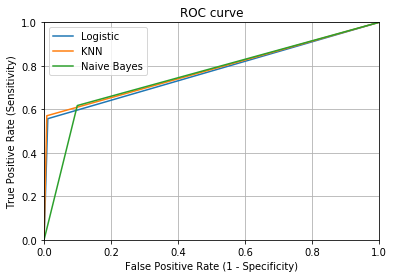

In [571]:
import matplotlib.pyplot as plt
LR_fpr, LR_tpr, LR_thresholds = metrics.roc_curve(y_test, LR.predict(X_test))
KNN_fpr, KNN_tpr, KNN_thresholds = metrics.roc_curve(y_test, knn.predict(scaledX_test))
NB_fpr, NB_tpr, NB_thresholds = metrics.roc_curve(y_test, NB.predict(X_test))
plt.plot(LR_fpr, LR_tpr,label='Logistic')
plt.plot(KNN_fpr, KNN_tpr, label='KNN')
plt.plot(NB_fpr, NB_tpr, label='Naive Bayes')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.legend()

###### With selected features 

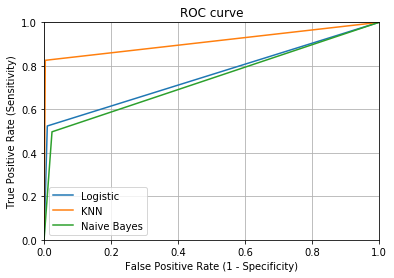

In [572]:
import matplotlib.pyplot as plt
LR_fpr1, LR_tpr1, LR_thresholds1 = metrics.roc_curve(y_test, LR1.predict(X_test[LR_subsetColumnList]))
KNN_fpr1, KNN_tpr1, KNN_thresholds1 = metrics.roc_curve(y_test, knn1.predict(scaledX_test[:,KNNsfs1.k_feature_idx_]))
NB_fpr1, NB_tpr1, NB_thresholds1 = metrics.roc_curve(y_test, NB2.predict(X_test[NB_subsetColumnList_b]))
plt.plot(LR_fpr1, LR_tpr1,label='Logistic')
plt.plot(KNN_fpr1, KNN_tpr1, label='KNN')
plt.plot(NB_fpr1, NB_tpr1, label='Naive Bayes')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.legend()

In [573]:
def evaluate_threshold(fpr,tpr,thresholds,threshold):
    print ('Sensitivity:', tpr[thresholds>threshold][-1])
    print ('Specificity:', 1-fpr[thresholds>threshold][-1])

In [574]:
print('LR - with all features: ')
evaluate_threshold(LR_fpr, LR_tpr, LR_thresholds,0.5)
print('F1 Score:' , metrics.f1_score(y_test, LR.predict(X_test)))
print('AUC Score:' , metrics.auc(LR_fpr, LR_tpr))

print('\nLR - with selected features: ')
evaluate_threshold(LR_fpr1, LR_tpr1, LR_thresholds1,0.5)
print('F1 Score:' , metrics.f1_score(y_test, LR1.predict(X_test[LR_subsetColumnList])))
print('AUC Score:' , metrics.auc(LR_fpr1, LR_tpr1))

print('\n\nKNN - with all features: ')
evaluate_threshold(KNN_fpr, KNN_tpr, KNN_thresholds,0.5)
print('F1 Score:' , metrics.f1_score(y_test, knn.predict(scaledX_test)))
print('AUC Score :' , metrics.auc(KNN_fpr, KNN_tpr))

print('\nKNN - with selected features: ')
evaluate_threshold(KNN_fpr1, KNN_tpr1, KNN_thresholds1,0.5)
print('F1 Score:' , metrics.f1_score(y_test, knn1.predict(scaledX_test[:,KNNsfs1.k_feature_idx_])))
print('AUC Score :' , metrics.auc(KNN_fpr1, KNN_tpr1))

print('\n\nNB - with all features: ')
evaluate_threshold(NB_fpr, NB_tpr, NB_thresholds,0.5)
print('F1 Score:' , metrics.f1_score(y_test, NB.predict(X_test)))
print('AUC Score :' , metrics.auc(NB_fpr, NB_tpr))

print('\nNB - with selected features: ')
evaluate_threshold(NB_fpr1, NB_tpr1, NB_thresholds1,0.5)
print('F1 Score:' , metrics.f1_score(y_test, NB2.predict(X_test[NB_subsetColumnList_b])))
print('AUC Score :' , metrics.auc(NB_fpr1, NB_tpr1))

LR - with all features: 
Sensitivity: 0.5570469798657718
Specificity: 0.9888971132494448
F1 Score: 0.6720647773279351
AUC Score: 0.7729720465576083

LR - with selected features: 
Sensitivity: 0.5234899328859061
Specificity: 0.9903774981495189
F1 Score: 0.65
AUC Score: 0.7569337155177124


KNN - with all features: 
Sensitivity: 0.5704697986577181
Specificity: 0.9918578830495929
F1 Score: 0.6938775510204079
AUC Score : 0.7811638408536555

KNN - with selected features: 
Sensitivity: 0.825503355704698
Specificity: 0.996299037749815
F1 Score: 0.888086642599278
AUC Score : 0.9109011967272566


NB - with all features: 
Sensitivity: 0.6174496644295302
Specificity: 0.9008142116950407
F1 Score: 0.49066666666666675
AUC Score : 0.7591319380622855

NB - with selected features: 
Sensitivity: 0.4966442953020134
Specificity: 0.9763138415988157
F1 Score: 0.580392156862745
AUC Score : 0.7364790684504146


Here we can see that with feature selection, scores has been improved. Area under the curve is showing max for KNN classifier which is .91 for selected features which was increased from .78 with all features. 

### Hence KNN is the best model to classify the loan acceptance among these 3 models. 

In [575]:
np.count_nonzero(knn1.predict(scaledX_test[:,KNNsfs1.k_feature_idx_]))

128

In [576]:
scaledX_test.shape

(1500, 13)

In [577]:
480*100/5000

9.6

In [579]:
128*100/1500

8.533333333333333

if we see here, KNN model is giving almost simillar probabilty in test data as it was in actual. 